In [43]:
#German credit dataset predicting default for a given borrower
import os
os.chdir(r"C:\Users\Collin\Documents\collins documents\Regis Homework\Machine Learning wk 4")
import pandas as pd

In [44]:
df = pd.read_csv("german_credit_risk.csv")
import numpy as np

In [45]:
df.head()

,Checking.Account,Duration,Credit.Hist,Purpose,Credit.Amount,Saving.Account,Employmnet,Disposable.Income,Personal.Status,Other.Debtors,...,Property,Age,Other.Loans,Housing,Existing.Credits,Job,Number.Liable,Telephone,Foreign.Worker,Cost.Matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [46]:
print(df.head())
print("Shape: {}".format(str(df.shape)))

  Checking.Account  Duration Credit.Hist Purpose  Credit.Amount  \
0              A11         6         A34     A43           1169   
1              A12        48         A32     A43           5951   
2              A14        12         A34     A46           2096   
3              A11        42         A32     A42           7882   
4              A11        24         A33     A40           4870   

  Saving.Account Employmnet  Disposable.Income Personal.Status Other.Debtors  \
0            A65        A75                  4             A93          A101   
1            A61        A73                  2             A92          A101   
2            A61        A74                  2             A93          A101   
3            A61        A74                  2             A93          A103   
4            A61        A73                  3             A93          A101   

   ...  Property Age  Other.Loans Housing Existing.Credits   Job  \
0  ...      A121  67         A143    A152       

In [47]:
dataTypeSeries=df.dtypes
dataTypeSeries

Checking.Account     object
Duration              int64
Credit.Hist          object
Purpose              object
Credit.Amount         int64
Saving.Account       object
Employmnet           object
Disposable.Income     int64
Personal.Status      object
Other.Debtors        object
Present.Residence     int64
Property             object
Age                   int64
Other.Loans          object
Housing              object
Existing.Credits      int64
Job                  object
Number.Liable         int64
Telephone            object
Foreign.Worker       object
Cost.Matrix           int64
dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Checking.Account   1000 non-null   object
 1   Duration           1000 non-null   int64 
 2   Credit.Hist        1000 non-null   object
 3   Purpose            1000 non-null   object
 4   Credit.Amount      1000 non-null   int64 
 5   Saving.Account     1000 non-null   object
 6   Employmnet         1000 non-null   object
 7   Disposable.Income  1000 non-null   int64 
 8   Personal.Status    1000 non-null   object
 9   Other.Debtors      1000 non-null   object
 10  Present.Residence  1000 non-null   int64 
 11  Property           1000 non-null   object
 12  Age                1000 non-null   int64 
 13  Other.Loans        1000 non-null   object
 14  Housing            1000 non-null   object
 15  Existing.Credits   1000 non-null   int64 
 16  Job                1000 non-null   object
 

In [49]:
category_list=list(df.select_dtypes(include = [object]).columns)
quant_list = list(df.select_dtypes(include = [np.int64, np.float64]).columns)

In [50]:
df_quant = df.drop(category_list, axis=1)
category_df= df.drop(quant_list, axis = 1)
category_dummies = pd.get_dummies(category_df)

In [51]:
final_dataframe = pd.concat([category_dummies, df_quant], axis = 1, join = 'outer')
final_dataframe.dtypes

Checking.Account_A11    uint8
Checking.Account_A12    uint8
Checking.Account_A13    uint8
Checking.Account_A14    uint8
Credit.Hist_A30         uint8
                        ...  
Present.Residence       int64
Age                     int64
Existing.Credits        int64
Number.Liable           int64
Cost.Matrix             int64
Length: 62, dtype: object

In [60]:
y = final_dataframe['Cost.Matrix']
X = final_dataframe[final_dataframe.columns[0:61]]
X.head()

,Checking.Account_A11,Checking.Account_A12,Checking.Account_A13,Checking.Account_A14,Credit.Hist_A30,Credit.Hist_A31,Credit.Hist_A32,Credit.Hist_A33,Credit.Hist_A34,Purpose_A40,...,Telephone_A192,Foreign.Worker_A201,Foreign.Worker_A202,Duration,Credit.Amount,Disposable.Income,Present.Residence,Age,Existing.Credits,Number.Liable
0,1,0,0,0,0,0,0,0,1,0,...,1,1,0,6,1169,4,4,67,2,1
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,48,5951,2,2,22,1,1
2,0,0,0,1,0,0,0,0,1,0,...,0,1,0,12,2096,2,3,49,1,2
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,42,7882,2,4,45,1,2
4,1,0,0,0,0,0,0,1,0,1,...,0,1,0,24,4870,3,4,53,2,2


In [61]:
final_dataframe.head()

,Checking.Account_A11,Checking.Account_A12,Checking.Account_A13,Checking.Account_A14,Credit.Hist_A30,Credit.Hist_A31,Credit.Hist_A32,Credit.Hist_A33,Credit.Hist_A34,Purpose_A40,...,Foreign.Worker_A201,Foreign.Worker_A202,Duration,Credit.Amount,Disposable.Income,Present.Residence,Age,Existing.Credits,Number.Liable,Cost.Matrix
0,1,0,0,0,0,0,0,0,1,0,...,1,0,6,1169,4,4,67,2,1,1
1,0,1,0,0,0,0,1,0,0,0,...,1,0,48,5951,2,2,22,1,1,2
2,0,0,0,1,0,0,0,0,1,0,...,1,0,12,2096,2,3,49,1,2,1
3,1,0,0,0,0,0,1,0,0,0,...,1,0,42,7882,2,4,45,1,2,1
4,1,0,0,0,0,0,0,1,0,1,...,1,0,24,4870,3,4,53,2,2,2


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [122]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtc.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.696


In [117]:
from sklearn.model_selection import GridSearchCV
dtc_pruned = DecisionTreeClassifier()
dtc_pruned.fit(X_train, y_train)
param_dict = {"max_depth":[1,3,5,10],
              "min_samples_leaf":[2,3,4,5,6,7,8,9,10],
              "max_leaf_nodes": [2,3,4,5,6,7,8,9,10]}
gs = GridSearchCV(dtc_pruned, param_dict, scoring = "f1_macro", 
                  n_jobs = -1, verbose = 2)
gs.fit(X_train, y_train)
print("Best Params: {}".format(gs.best_params_))

C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    1.4s


Best Params: {'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 2}


[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:    2.2s finished


In [125]:
dtc_pruned = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 2, max_leaf_nodes = 8)
dtc_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [126]:
print("Accuracy on training set: {:.3f}".format(dtc_pruned.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtc_pruned.score(X_test, y_test)))

Accuracy on training set: 0.745
Accuracy on test set: 0.740


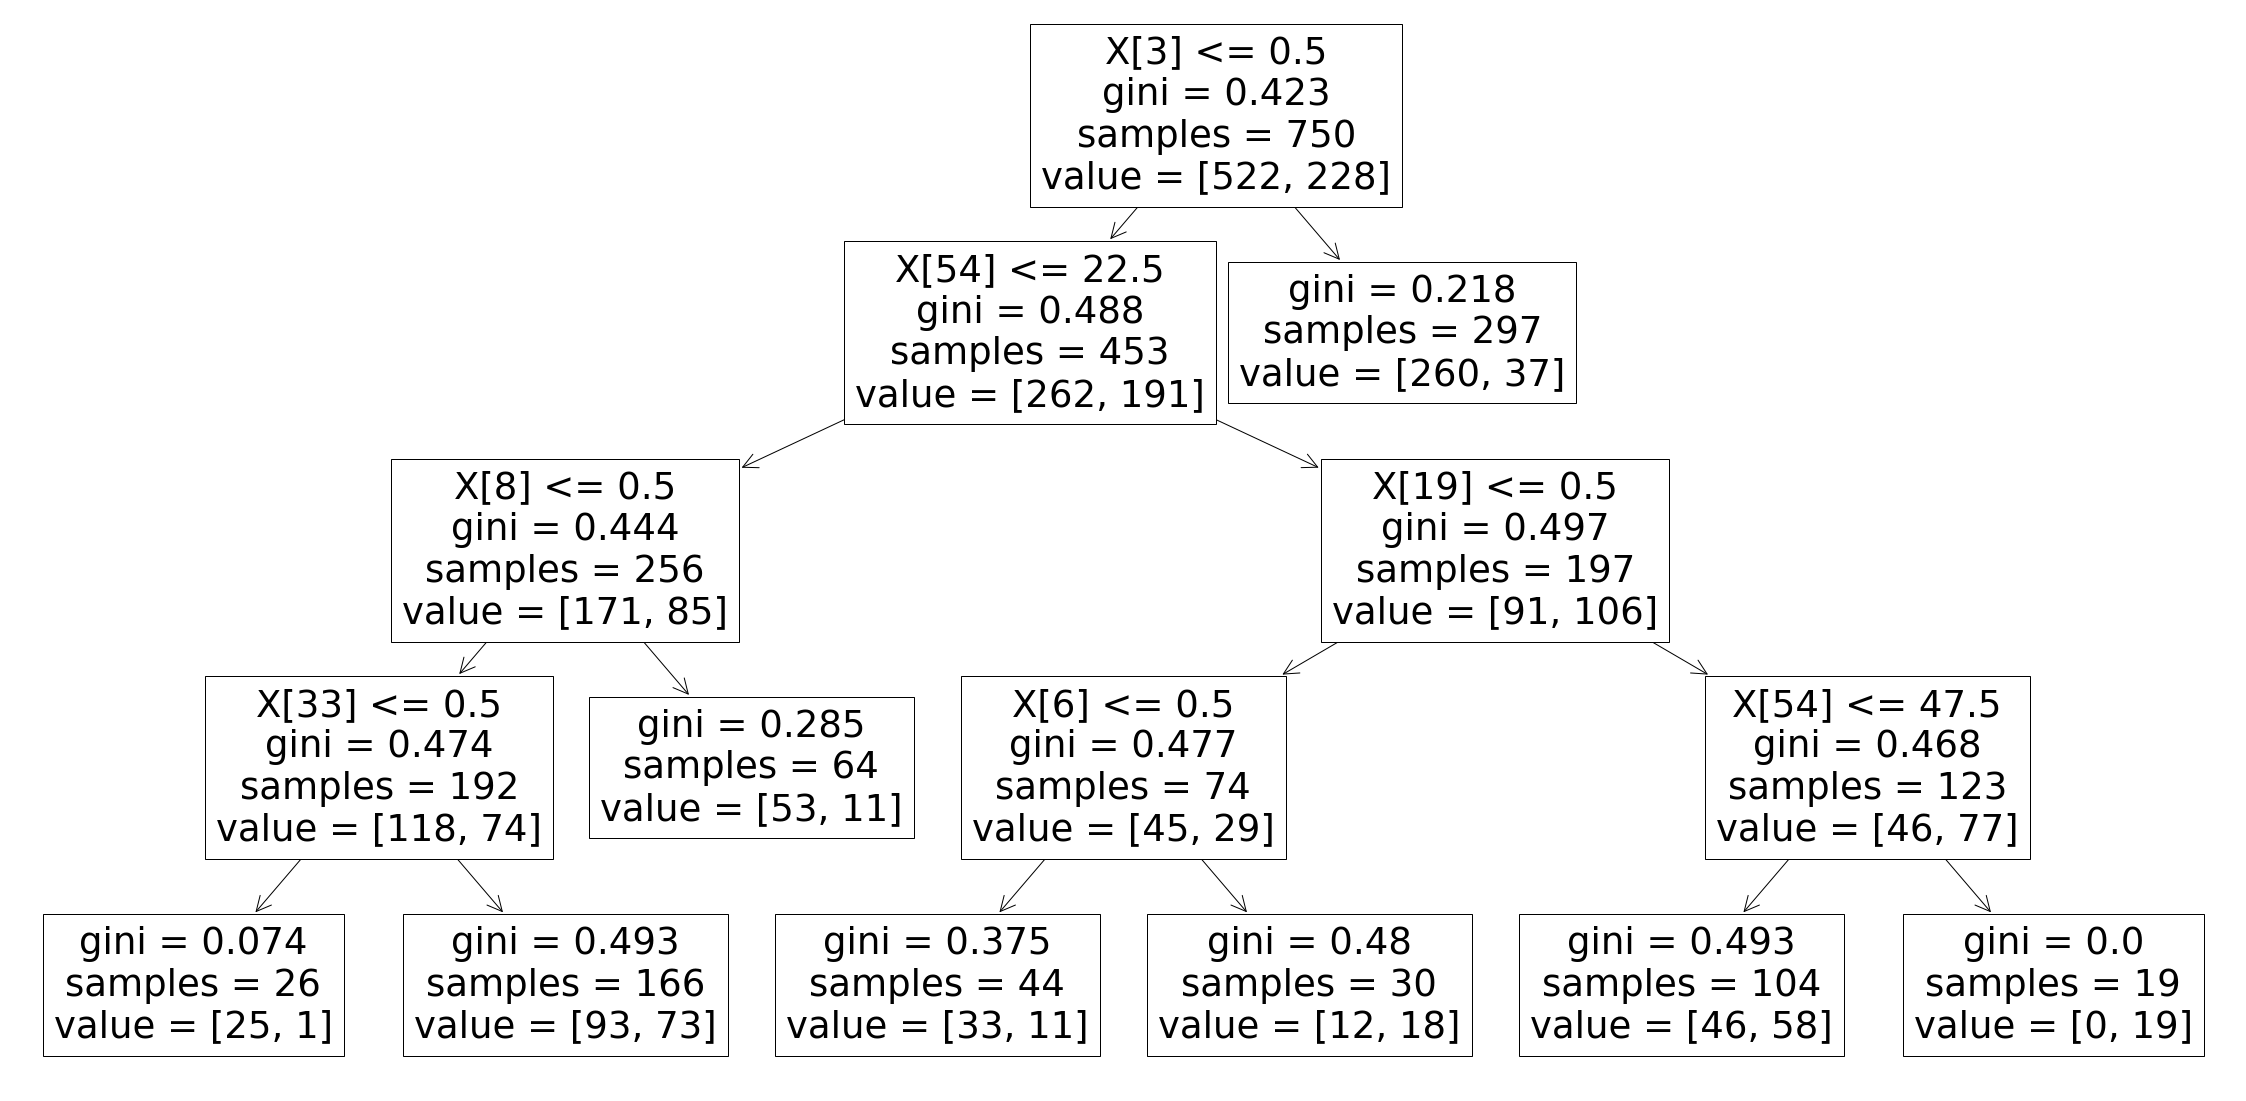

In [128]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40, 20))
tree.plot_tree(dtc_pruned, ax=ax)
plt.show()

In [305]:
X.head()

,Checking.Account_A11,Checking.Account_A12,Checking.Account_A13,Checking.Account_A14,Credit.Hist_A30,Credit.Hist_A31,Credit.Hist_A32,Credit.Hist_A33,Credit.Hist_A34,Purpose_A40,...,Telephone_A192,Foreign.Worker_A201,Foreign.Worker_A202,Duration,Credit.Amount,Disposable.Income,Present.Residence,Age,Existing.Credits,Number.Liable
0,1,0,0,0,0,0,0,0,1,0,...,1,1,0,6,1169,4,4,67,2,1
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,48,5951,2,2,22,1,1
2,0,0,0,1,0,0,0,0,1,0,...,0,1,0,12,2096,2,3,49,1,2
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,42,7882,2,4,45,1,2
4,1,0,0,0,0,0,0,1,0,1,...,0,1,0,24,4870,3,4,53,2,2


In [175]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(random_forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(random_forest.score(X_test, y_test)))

Accuracy on training set: 0.985
Accuracy on test set: 0.744


C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [191]:
param_dict1 = {"n_estimators":[100,500,1000,2500],
              "max_depth":[1,3,5,10, 15, 20],
              "min_impurity_decrease": [.0001, .0003, .0005, .0008, .001]}
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
gs1 = GridSearchCV(rf, param_dict1, scoring = "f1_macro", 
                  n_jobs = -1, verbose = 2)
gs1.fit(X_train, y_train)
print("Best Params: {}".format(gs1.best_params_))

C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min


Best Params: {'max_depth': 15, 'min_impurity_decrease': 0.0001, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.8min finished


In [290]:
rf_pruned = RandomForestClassifier(max_depth = 16, n_estimators = 100, min_impurity_decrease = .0003)
rf_pruned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0003, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [291]:
print("Accuracy on training set: {:.3f}".format(rf_pruned.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_pruned.score(X_test, y_test)))

Accuracy on training set: 0.987
Accuracy on test set: 0.784


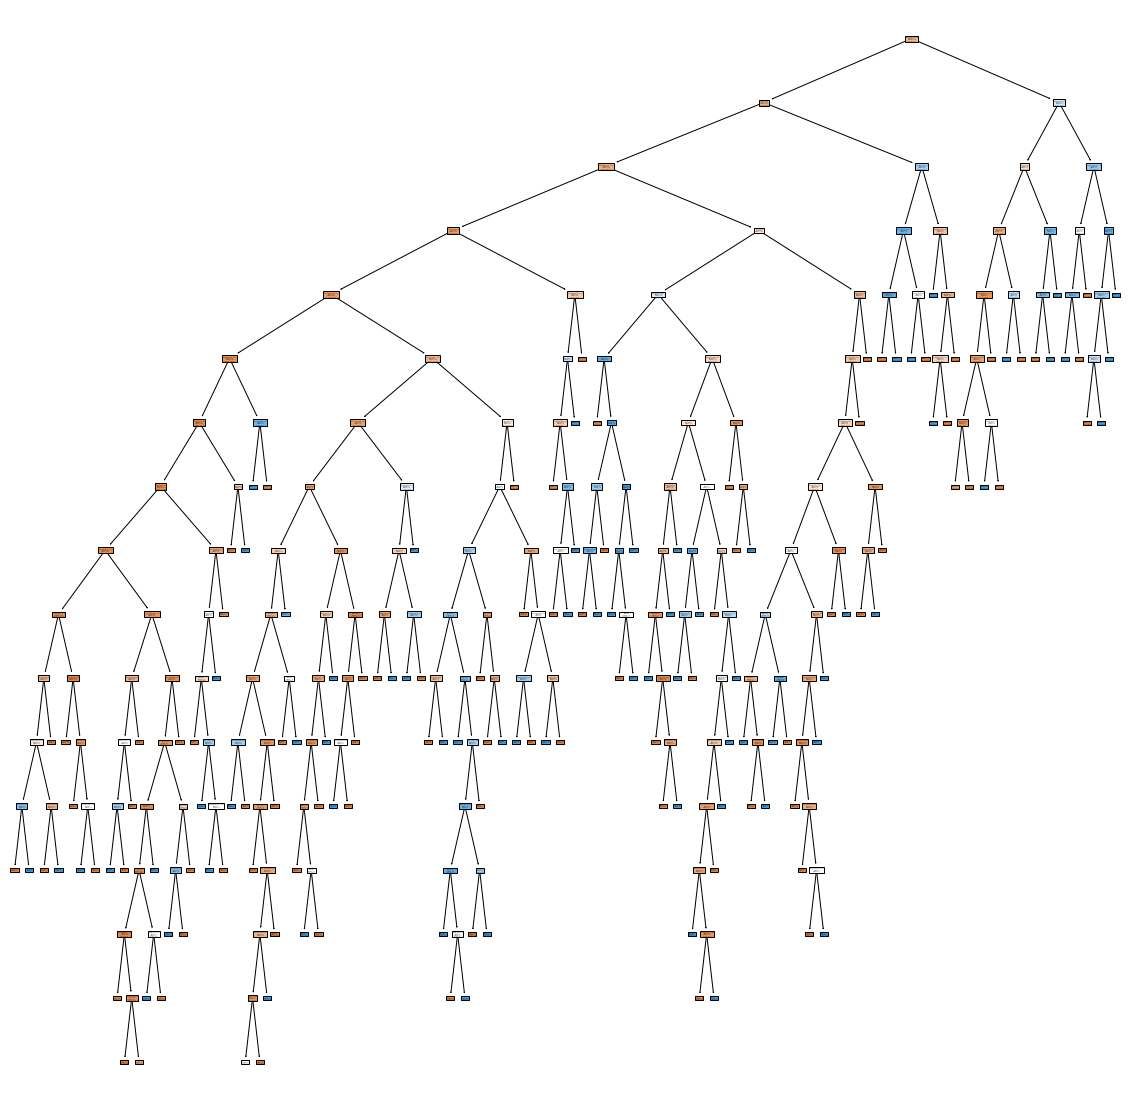

In [220]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf_pruned.estimators_[0], feature_names=X.columns, filled=True)

In [292]:
rf_pruned.estimators_[0].tree_.max_depth

16

In [295]:
rf_pruned_plot = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_pruned_plot.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

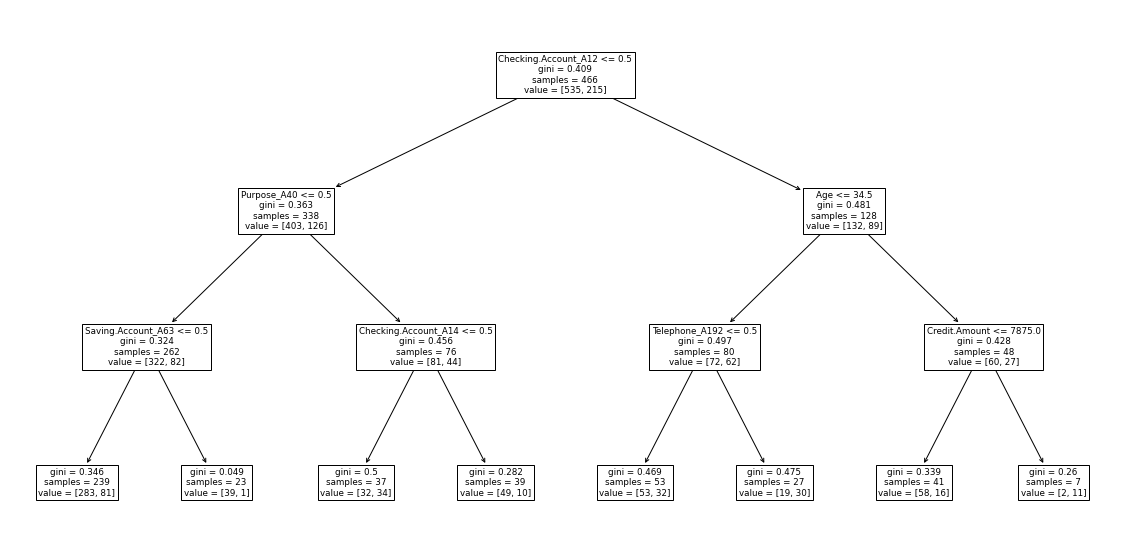

In [303]:
fig, ax = plt.subplots(figsize=(20, 10))
rfplot = tree.plot_tree(rf_pruned_plot.estimators_[0], feature_names=X.columns, ax = ax)

